# Automates cellulaires: le jeu de la vie

Le <b>« jeu de la vie »</b> est un automate cellulaire inventé par John Horton Conway en 1970. C’est un système dynamique qui représente l’évolution de cellules disposées sur une grille.

À chaque étape, chaque cellule est soit "vivante" soit "morte", et l’évolution de chaque cellule est entièrement déterminée par l’état de ses huit voisines, selon les 3 règles suivantes (cf. Figure 1):
* R1 : Si une cellule est morte et qu’elle possède exactement 3 voisines vivantes, alors elle devient vivante.
* R2 : Si une cellule est vivante et qu’elle possède strictement moins de 2 voisines vivantes, alors elle devient morte.
* R3 : Si une cellule est vivante et qu’elle possède strictement plus de 3 voisines vivantes, alors elle devient morte.
* Dans tous les autres cas, l’état (vivant ou mort) de la cellule ne change pas.

<img src = "figures/fig1.png" width = "400">

Nous allons implémenter le jeu de la vie dans un tableau à 3 dimensions (array). Les cellules vivantes et mortes sont représentées par des 1 et des 0, respectivement. Les « couches » successives du tableau (3ème dimension) correspondent aux configurations successives du système dynamique au cours du temps (cf. Figure 2). 

<img src="figures/fig2.png" width = "300">

1. Importez les librairies `numpy` et `matplotlib` en exécutant les instructions suivantes. <br>
– La librairie `numpy` contient des fonctions relatives au calcul scientifique; <br>
– La librairie `matplotlib` contient des fonctions de graphisme.

In [4]:
# librairies numpy et matplotlib
import numpy as np
import matplotlib.pyplot as plt

2. Définissez deux variables `taille = 150` et `temps = 400` qui représentent la dimesion de votre "matrice celluliare" et la "durée de votre simulation", respectivement.

In [5]:
taille = 150 # grid size
temps = 400  # simulatiton's duration

3. Créez une matrice carrée `X_0` de taille `taille x taille` comprenant 40% de 1 et 60% de 0. Utilisez la fonction `np.random.binomial(...)` (cf. doc. sur le web). Cette fonction permet de tirer des éléments au hasard selon une loi binomiale et de les disposer dans un tableau 'numpy', qu'ona appelle un `numpy array` ou (`np.array`). Visualisez ensuite votre matrice en utilisant la fonction `plt.imshow(...)`.

[[1 1 0 ... 1 1 0]
 [0 0 0 ... 1 0 0]
 [1 0 1 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 1 1]
 [1 1 1 ... 1 0 0]]


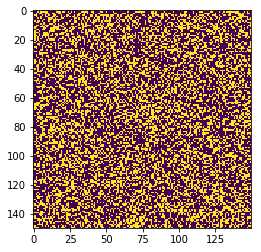

In [11]:
X_0 = np.random.binomial(1, 0.40, size = (taille, taille))
print(X_0)
plt.imshow(X_0)

4. La simulation de notre jeu de la vie sera stockée dans un tableau 'numpy' 3D: chaque couche représente une configuration à un instant `t` (cf. figure 2). <br>
Initialiser un tableau 'numpy' (`np.array`) tridimensionel, appelé `simul`, qui est de taille `taille x taille x temps` et qui est composé uniquement de `0`'s. Utilisez la fonction `np.zeros(...)` (cf. doc.).

In [13]:
# on initialise un tableau 3D de dimensions 'taille x taille x temps' rempli avec des 0
simul = np.zeros(shape = (taille, taille, temps))

5. Définissez une fonction `voisins(X, i, j)` qui prend en paramètres un tableau 'numpy' à 2 dimensions `X` ainsi deux entiers `i` et `j`, et qui retourne un vecteur 'numpy' composé des 8 voisins de l'élément `X[i,j]`  de `X`. Pour info, avec `numpy`, l'élément `(i,j)` de `X` se note `X[i,j]`.

In [14]:
# on définit la fonction 'voisins' qui retourne les 8 voisins d'une celllule donnée
def voisins(X, i, j):
    "retourne les 8 voisins de la cellule X[i,j]"
    return np.array([X[i-1,j-1], 
                     X[i-1,j], 
                     X[i-1,j+1],
                     X[i,j-1],
                     X[i,j+1],  
                     X[i+1,j-1],
                     X[i+1,j],
                     X[i+1,j+1]
                    ])

6. Testez votre fonction `voisins(X, i, j)` sur votre matrice `X_0`.

In [16]:
v = voisins(X_0, 23, 62)
print(v)
print(v.ndim)
print(v.shape)
print(len(v))

[0 1 0 0 0 0 0 0]
1
(8,)
8


7. Créez une fonction de mise à jour, appelée `maj(X)`, qui prend en paramètre une matrice `X` et qui retourne la matrice `X2` obtenue après application des 3 règles ci-dessus à tous ces éléments. Pour cela: <br>
– Créez une copie non-modifiable de `X`: `X2 = np.copy(X)`. <br>
– Parcourez les éléments de `X` à l'aide d'une double boucle `for`. Pas besoin de parcourir les éléments des bords de la matrice, car ceux-ci ne possèdent pas leurs 8 voisins au complet. Passez donc en revue uniquement les éléments de la sous-matrice de `X` de taille `(taille - 2) x (taille - 2)`. <br>
– Mettez à jour l'élément `X2[i,j]` obtenu par application des  trois règles du jeu de la vie, appliquées à l'élément `X[i,j]` et à ces voisins `voisins(X, i, j)`. <br>

In [20]:
# On crée une fonction de mise à jour qui prend en paramètre 
# une matrice X et retourne la matrice X2 obtenue par 
# l’application des 3 règles ci-dessus aux éléments de X.
# On evite les bords de la matrice qui pose problème,
# car ils n'ont pas de. voisins
def maj1(X):
    X2 = np.copy(X) # non-modifiable copy of X
    for i in range(1, taille-1):
        for j in range(1, taille-1):
            if X[i,j] == 0 and np.sum(voisins(X, i, j)) == 3: # rule 1
                X2[i,j] = 1
            elif X[i,j] == 1 and np.sum(voisins(X, i, j)) < 2: # rule 2
                X2[i,j] = 0
            elif X[i,j] == 1 and sum(voisins(X, i, j)) > 3: # rule 3
                X2[i,j] = 0
    return(X2)

8. Testez votre fonction `maj(...)` sur votre matrice `X_0`. Visualizez la matrice obtenue à l'aide de la fonction `plt.imshow(...)`.

In [19]:
maj1(X_0)

array([[1, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 0, 0]])

9. Remplissez votre tableau 'numpy' 3D `simul` de telle sorte qu'il contienne la simulation de votre "jeu de la vie". Plus précisément: <br>
– la première couche de `simul` est égale à la matrice `X_0`; <br>
– pour tout indice `t` allant de `2` à `temps-1`, la couche d’indice `t+1` de `simul` corresponde à la mise à jour de la couche d’indice `t`; utilisez votre fonction `maj(...)`; <br>
– <u>indication</u>: avec numpy, la `t`-ème couche de `simul` si dit `simul[:, :, t]`. La comilation de ce code peut prendre un peu de temps.

In [21]:
# On remplit le tableau 'simul' de telle sorte que:
# 1. sa première couche soit égale à la matrice X_0
# 2. pour tout indice t allant de 2 à temps-1, la couche d’indice t+1
#    corresponde à la mise à jour (donnée par la fonction du point 6)
#    de la couche d’indice t
simul[:, :, 0] = X_0 # première couche
for t in range(1, temps):
    simul[:, :, t] = maj1(simul[:, :, t-1])

10. Visulalisez quelques couches différents de votre tableau avec la fonction `plt.imshow(...)`.

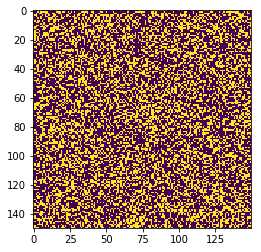

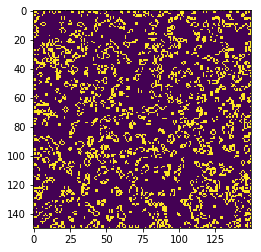

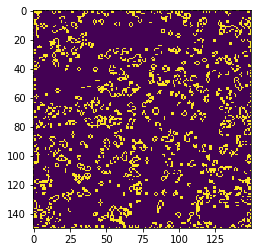

In [22]:
# la simulation est représentée par les couches succesives tu tableau
plt.imshow(simul[:, :, 0])  # temps 0
plt.show()
plt.imshow(simul[:, :, 15])  # temps 15
plt.show()
plt.imshow(simul[:, :, 30])  # temps 30
plt.show()

11. Compilez le code ci-dessous pour créer une animation à partir de votre tableau `simul`. L'animation est obtenue en affichant les couches sucessives de `simul` à quelques milisecondes d'intervalles.

/Users/jeremie.cabessau-paris2.fr/Library/Python/3.7/lib/python/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


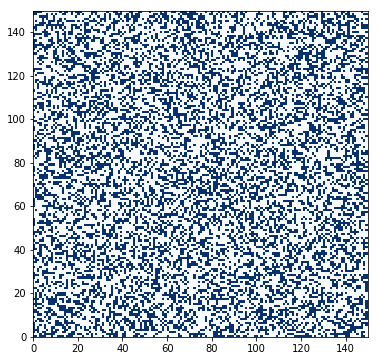

In [23]:
# On crée l'animation de notre simulation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# figure
fig, ax = plt.subplots(figsize = (6, 6))
ax.set(xlim = (0, taille), ylim = (0, taille))

# first image
x = np.linspace(0, taille, taille + 1)
y = np.linspace(0, taille, taille + 1)
image = ax.pcolormesh(x, y, simul[:, :, 0], vmin = 0, vmax = 1, cmap = "Blues")
#fig.colorbar(image)

# update function
def animate(t):
    image.set_array(simul[:, :, t].flatten())

# show animation
anim = FuncAnimation(fig, animate, interval = 75, frames = temps)
HTML(anim.to_html5_video())

12. <b>Optimisation du code</b> <br>
– Votre fonction de mise à jour utilise une doucle boucle `for`, ce qui ralentit fortement l'exécution. <br>
– Une autre manière de faire consiste à utiliser la technique de la <b>« vectorisation »</b> ou <b>« broadcasting »</b>, qui permet d'appliquer des fonctions à tous les éléments d'un tableau en même temps, "en parallèle", comme on dit. La librairie `numpy` est optimisée pour cela. <br>
– Ainsi, essayez de recompiler votre code en utilisant la fonction de mise à jour suivante, qui est vectorisée. Notez que cette fonction n'utilise plus de boucle `for`!

In [1]:
# Pour faire la somme des voisins d'une matrice, on utilise une
# fonction de convolution bi-dimentionnelle de la librairie scipy
from scipy.signal import convolve2d

def maj2(X):
    # on définit le "filtre" qui permettra de considérer les voisins des éléments
    X2 = convolve2d(X, np.ones((3,3), dtype = int), "same") - X
    
    # partout où X[i, j] == 0 et la somme des voisins de X[i, j] == 3, on met un 1
    # partout où X[i, j] == 1 la somme des voisins de X[i, j] > 1, on met un 0
    # partout où X[i, j] == 1 la somme des voisins de X[i, j] > 3, on met un 0
    X3 = np.copy(X) # copie non-modifiable de X
    X3[(X == 0) * (X2 == 3)] = 1 # broadcasting here
    X3[(X == 1) * (X2 < 2)] = 0  # broadcasting here
    X3[(X == 1) * (X2 > 3)] = 0  # broadcasting here
    
    # on retourne X3
    return X3

13. Grâce à la librairie `timeit`, vous pouvez comparer le temps d'exécution de vos deux fonctions de mise à jour. Complilez le code ci-dessous...

In [18]:
# on compare les temps d'exécution de maj et maj2
import timeit

%timeit maj(X_0)
%timeit maj2(X_0)

# ms (10^-3 seconds)
# µs (10^-6 seconds)
# On voit que la deuxième méthode est ~400 fois plus rapide!
# Cecei est très important, cela peut faire la différence
# entre 1 jour et 400 jours de calcul!

184 ms ± 6.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
914 µs ± 44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
